<a href="https://colab.research.google.com/github/makarioszen/imersao-dados-2-2020/blob/master/alura_imersao_dados_2_desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Alura - Imersão Dados 2 - Desafios**
**Marco Martins**

In [2]:
import pandas as pd
source = "https://github.com/makarioszen/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
df = pd.read_csv(source)

# Aula 1

<BarContainer object of 65 artists>

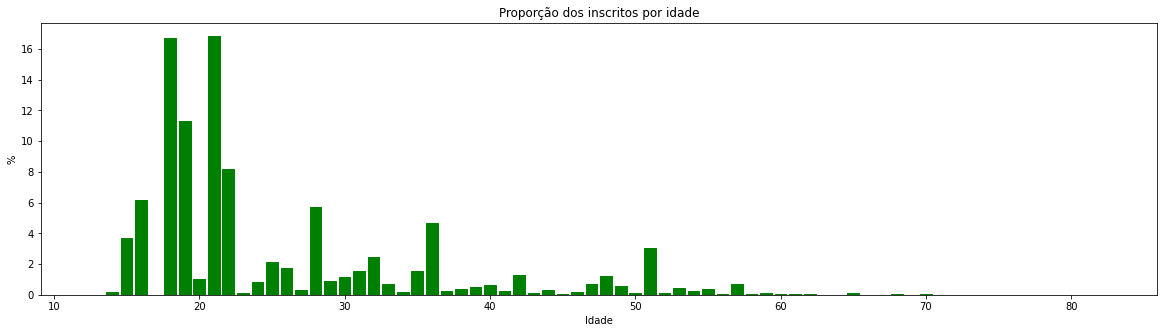

In [3]:
#Desafio 01: Proporção dos inscritos por idade.
import matplotlib.pyplot as plt
age_counts = df['NU_IDADE'].value_counts()
number_of_rows = len(df.index)
age_percents = (age_counts/number_of_rows)*100
age_percents_by_index = age_percents.sort_index()

label = df['NU_IDADE'].unique()
plt.figure(figsize = (20, 5))
plt.title('Proporção dos inscritos por idade')
plt.ylabel("%")
plt.xlabel("Idade")
plt.bar(label, age_percents_by_index, color = 'g', ec = 'g')



In [ ]:
# Desafio 02: Descobrir de quais estados são os inscritos com 13 anos.
states = df.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"]
states

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

Text(0.5, 1.0, 'Título do Histograma')

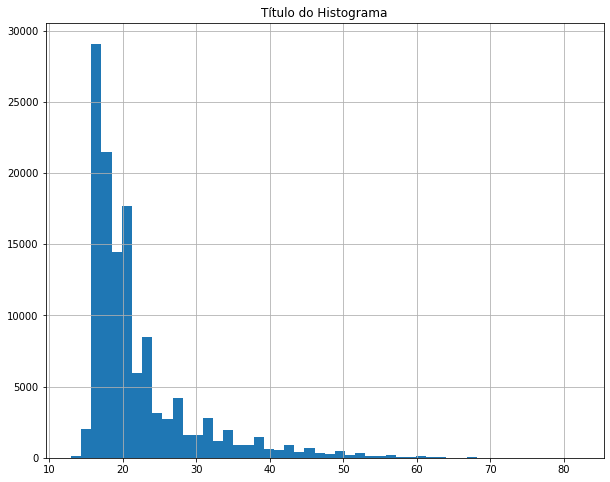

In [ ]:
# Desafio 03: Inserir título no histograma
df['NU_IDADE'].hist(bins = 50, figsize=(10,8))
plt.title("Título do Histograma")

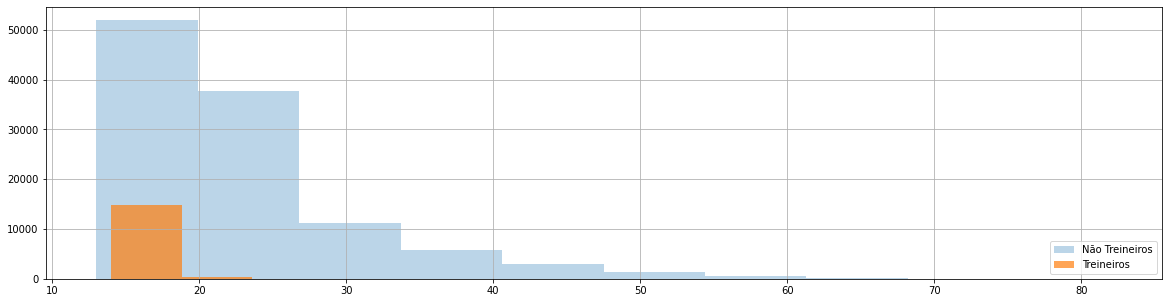

In [ ]:
# Desafio 04: Plotar os histogramas das idades dos treineiros e dos não treineiros
trainers = df.query("IN_TREINEIRO == 1")["NU_IDADE"]
not_trainers = df.query("IN_TREINEIRO != 1")["NU_IDADE"]

plt.figure(figsize = (20,5)) 
not_trainers.hist(alpha = 0.3, label = "Não Treineiros")
trainers.hist( alpha = 0.7, label = "Treineiros")

plt.legend(loc='lower right')

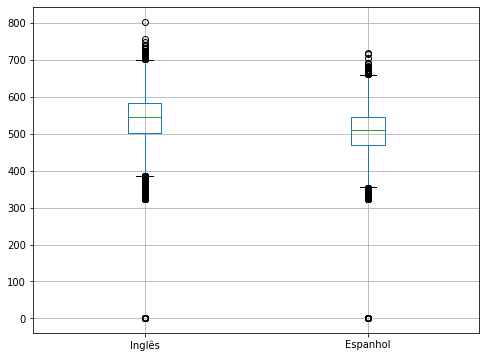

In [ ]:
# Desafio 05: Comparar as distribuições das provas em inglês e espanhol
notas_LC_eng = df.query("TP_LINGUA == 0")["NU_NOTA_LC"]
notas_LC_espn =  df.query("TP_LINGUA == 1")["NU_NOTA_LC"]
df_languages = pd.DataFrame({
    'Inglês' : notas_LC_eng,
    'Espanhol' : notas_LC_espn,
})
df_languages.plot.box(grid = True, figsize=(8,6))

# Aula 2

In [ ]:
#MEGA DESAFIO DA THAINÁ: Pegar a amostra completa dos alunos de 13 e 14 anos

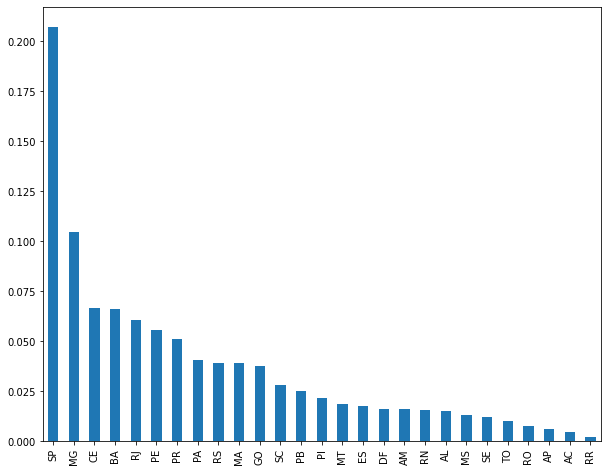

In [5]:
#Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e compara a proporção por estado.
students_lt_14 = df.query("NU_IDADE <= 18")
students_lt_14["SG_UF_RESIDENCIA"].value_counts(normalize = True).plot.bar(figsize=(10,8))

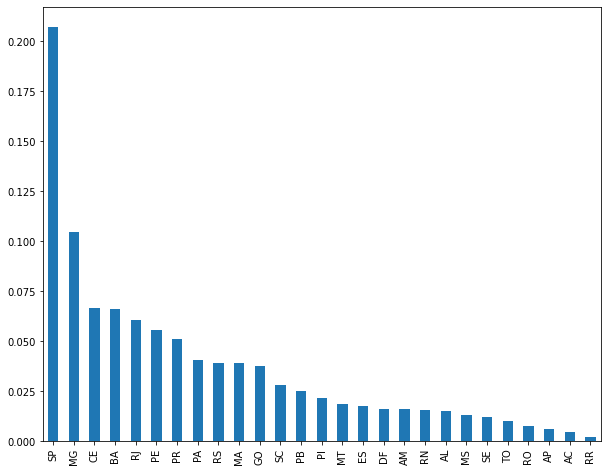

In [4]:


#Desafio 3: Criar uma função para plotar o boxplot do seaborn

#Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente

#Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)

#Desafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

#Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.